<a href="https://colab.research.google.com/github/DSF-Kotaro/classroom/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E6%BC%94%E7%BF%92%E2%85%A0B%E3%80%8010_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>１．株価の時間による変化を確認
<br>２．日ごとの変動を可視化
<br>３．移動平均を計算する
<br>４．複数の株価の終値の相関を計算する
<br>５．複数の株価の変動の関係を見る
<br>６．特定の株のリスクを計算する
<br>７．シミュレーションを使った未来の予測

##株価の時間による変化を確認

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import pandas_datareader.data as web
from datetime import datetime

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)
apikey = 'NYBUVFWD9VYXZBA2'

In [4]:
for stock in tech_list:
  globals()[stock] = web.DataReader(stock,'av-daily',start,end, api_key=apikey)


In [5]:
AAPL.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,131.824187,133.199581,130.381126,131.818909,9.629674e+07
std,11.095644,11.034941,11.115885,11.115766,3.230753e+07
min,109.110000,110.680000,107.320000,108.770000,4.639767e+07
25%,123.287500,124.622500,121.455000,122.985000,7.494100e+07
50%,130.090000,131.499950,128.655000,130.470000,9.008387e+07
75%,142.042500,144.062500,140.155000,142.030000,1.116616e+08
max,156.980000,157.260000,154.390000,156.690000,2.623305e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2020-10-07 to 2021-10-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
 1   high    252 non-null    float64
 2   low     252 non-null    float64
 3   close   252 non-null    float64
 4   volume  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


##日ごとの変動を可視化

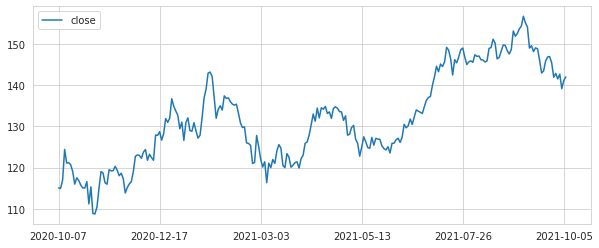

In [7]:
AAPL['close'].plot(legend = True, figsize = (10,4))

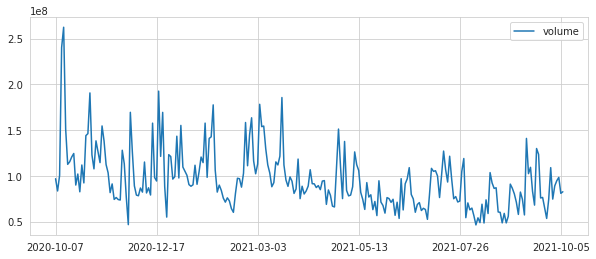

In [8]:
AAPL['volume'].plot(legend = True, figsize = (10,4))

##移動平均を計算する

In [9]:
ma_day = [10,20,50]

for ma in ma_day:
  columns_name = 'MA{}'.format(ma)
  AAPL[columns_name] = AAPL['close'].rolling(ma).mean()

AAPL.head()

,open,high,low,close,volume,MA10,MA20,MA50
2020-10-07,114.62,115.55,114.1300,115.08,96848985,NaN,NaN,NaN
2020-10-08,116.25,116.40,114.5901,114.97,83477153,NaN,NaN,NaN
2020-10-09,115.28,117.00,114.9200,116.97,100506865,NaN,NaN,NaN
2020-10-12,120.06,125.18,119.2845,124.40,240226769,NaN,NaN,NaN
2020-10-13,125.27,125.39,119.6500,121.10,262330451,NaN,NaN,NaN


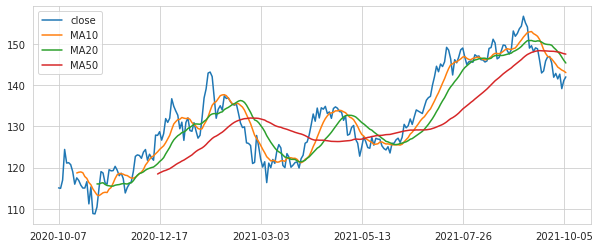

In [10]:
AAPL[['close','MA10','MA20','MA50']].plot(subplots = False, figsize=(10,4))

##複数の株価の変動の関係を見る

In [11]:
AAPL['Daily Return'] = AAPL['close'].pct_change()
AAPL.head()

,open,high,low,close,volume,MA10,MA20,MA50,Daily Return
2020-10-07,114.62,115.55,114.1300,115.08,96848985,NaN,NaN,NaN,NaN
2020-10-08,116.25,116.40,114.5901,114.97,83477153,NaN,NaN,NaN,-0.000956
2020-10-09,115.28,117.00,114.9200,116.97,100506865,NaN,NaN,NaN,0.017396
2020-10-12,120.06,125.18,119.2845,124.40,240226769,NaN,NaN,NaN,0.063521
2020-10-13,125.27,125.39,119.6500,121.10,262330451,NaN,NaN,NaN,-0.026527


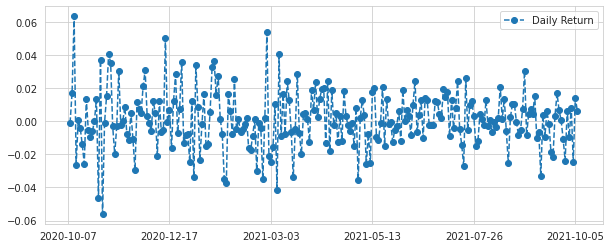

In [12]:
AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle ='--', marker ='o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


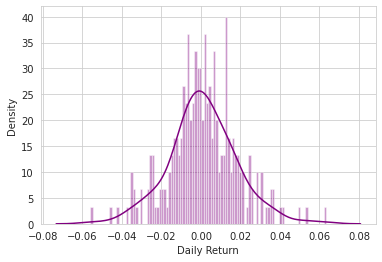

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'purple')

##複数の株価の終値の相関を計算する

In [14]:
AAPL_close =AAPL.close
GOOG_close =GOOG.close
MSFT_close =MSFT.close
AMZN_close =AMZN.close

closing_df = pd.concat([AAPL_close,GOOG_close,MSFT_close,AMZN_close],axis = 1)
closing_df.columns = ['AAPL','GOOG','MSFT','AMZN']
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
2020-10-07,115.08,1460.29,209.83,3195.69
2020-10-08,114.97,1485.93,210.58,3190.55
2020-10-09,116.97,1515.22,215.81,3286.65
2020-10-12,124.40,1569.15,221.40,3442.93
2020-10-13,121.10,1571.68,222.86,3443.63


In [15]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,-0.000956,0.017558,0.003574,-0.001608
2020-10-09,0.017396,0.019712,0.024836,0.030120
2020-10-12,0.063521,0.035592,0.025902,0.047550
2020-10-13,-0.026527,0.001612,0.006594,0.000203


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


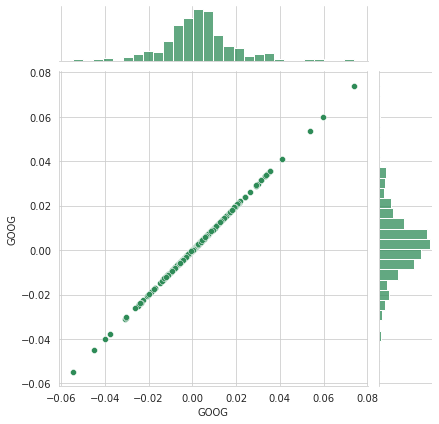

In [16]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


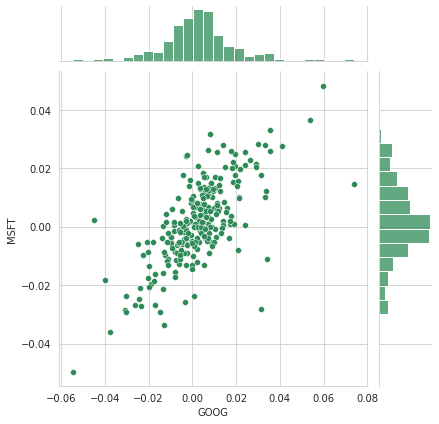

In [17]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


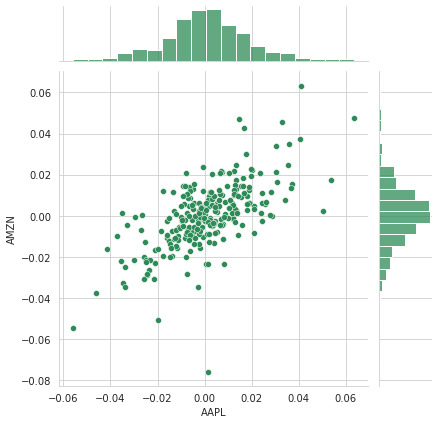

In [18]:
sns.jointplot('AAPL','AMZN',tech_rets,kind = 'scatter', color='seagreen')

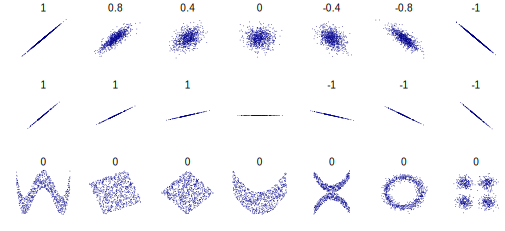

In [19]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

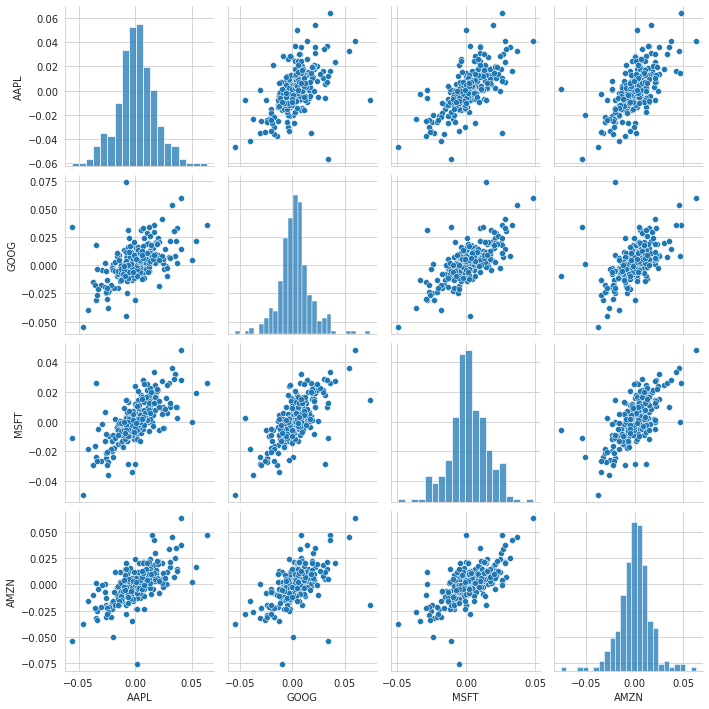

In [20]:
sns.pairplot(tech_rets.dropna())

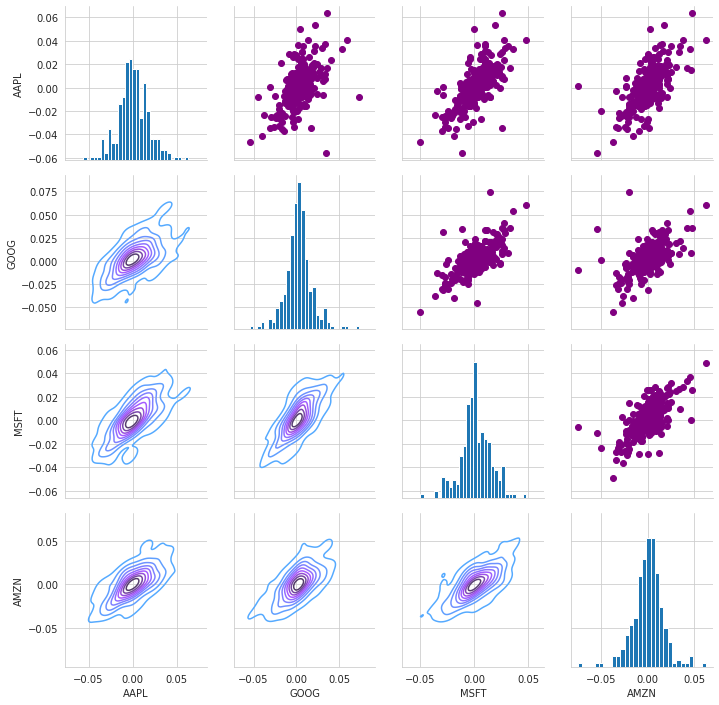

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

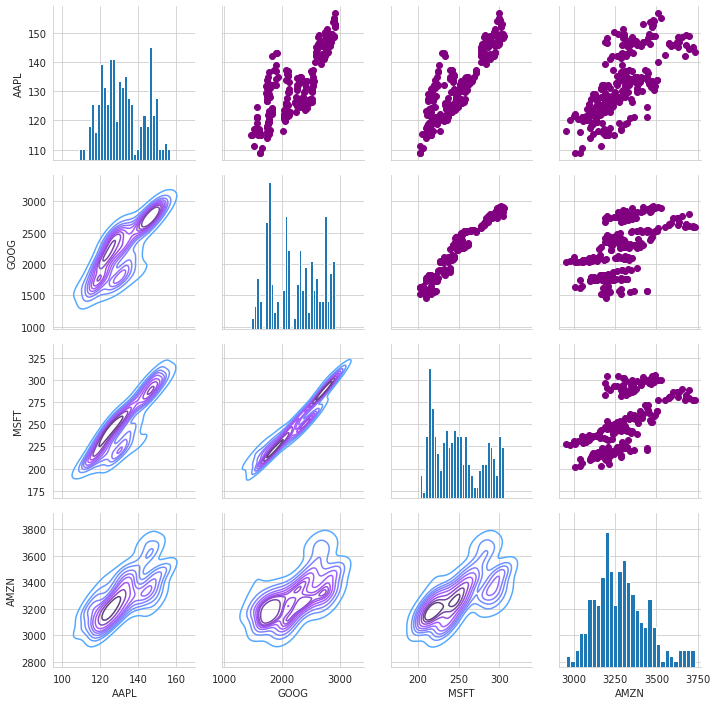

In [22]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

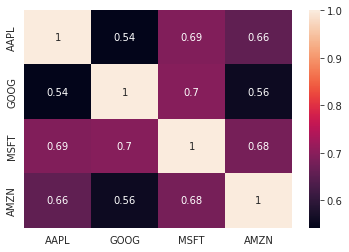

In [23]:
sns.heatmap(tech_rets.corr(), annot= True)

##特定の株のリスクを計算する

In [24]:
rets = tech_rets.dropna()
rets.head()

,AAPL,GOOG,MSFT,AMZN
2020-10-08,-0.000956,0.017558,0.003574,-0.001608
2020-10-09,0.017396,0.019712,0.024836,0.030120
2020-10-12,0.063521,0.035592,0.025902,0.047550
2020-10-13,-0.026527,0.001612,0.006594,0.000203
2020-10-14,0.000743,-0.002291,-0.008974,-0.023208


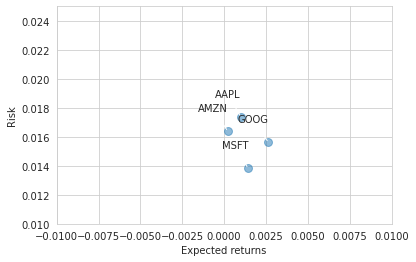

In [25]:
plt.scatter(rets.mean(),rets.std(),alpha= 0.5, s= np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.01,0.01])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label,xy = (x, y), xytext = (0, 20),
               textcoords = 'offset points', ha = 'right',
               arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


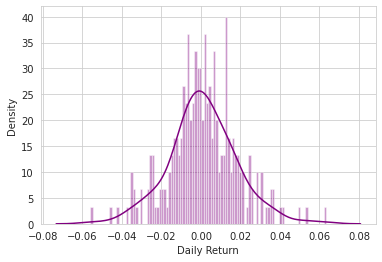

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [27]:
rets['AAPL'].quantile(0.05)

-0.026720868955740662

##シミュレーションを使った未来の予測

In [28]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
  price = np.zeros(days)
  price[0] = start_price
  shock = np.zeros(days)
  drift = np.zeros(days)

  for x in range(1,days):
    shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
    drift[x] = mu * dt
    price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
  return price

In [30]:
GOOG.head()

,open,high,low,close,volume
2020-10-07,1464.29,1468.96,1436.00,1460.29,1746156
2020-10-08,1465.09,1490.00,1465.09,1485.93,1187831
2020-10-09,1494.70,1516.52,1489.45,1515.22,1435542
2020-10-12,1543.00,1593.86,1532.57,1569.15,2482560
2020-10-13,1583.73,1590.00,1563.20,1571.68,1601043


Text(0.5, 1.0, 'Monte Carlo Analysis')

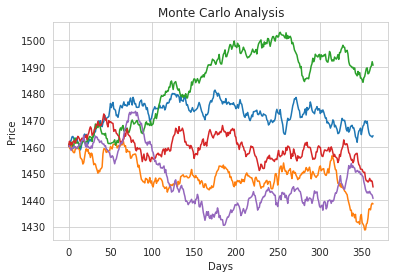

In [31]:
start_price = GOOG.iloc[0,3]

for run in range(5):
  plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [32]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([1379.18197539, 1380.06575428, 1380.94953317, ..., 1554.1701952 ,
        1555.05397409, 1555.93775297]),
 <a list of 200 Patch objects>)

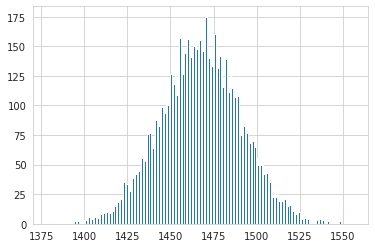

In [33]:
plt.hist(simulations, bins = 200)

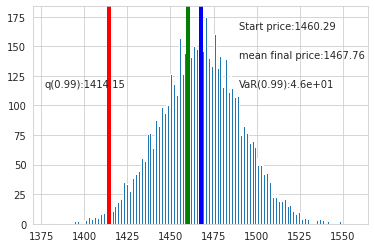

In [37]:
q = np.percentile(simulations , 1)
plt.hist(simulations,bins = 200)

plt.figtext(0.6,0.8, s = 'Start price:{:0.2f}'.format(start_price))
plt.figtext(0.6,0.7,'mean final price:{:0.2f}'.format(simulations.mean()))
plt.figtext(0.6,0.6,'VaR(0.99):{:0.2}'.format(start_price-q))
plt.figtext(0.15,0.6,'q(0.99):{:0.2f}'.format(q))

plt.axvline(x = q, linewidth = 4, color = 'r')
plt.axvline(x = start_price, linewidth = 4, color = 'g')
plt.axvline(x = simulations.mean(), linewidth = 4, color = 'b')